In [124]:
# import libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np


In [7]:
# read the csv file into a dataframe and evaluate the head

df = pd.read_csv('dodgers.csv')

df.head() # check first 5 rows of the df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [176]:
# assess dataframe shape
df.shape

(81, 12)

In [98]:
# describe the numeric data
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [99]:
# describe the non-numeric data
df.describe(exclude = 'number')

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Sunday,Rockies,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


In [37]:
# group the attendance by day of the week

df_group_day = df.groupby('day_of_week')

In [27]:
# check the data types

df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [103]:
# convert columns into categories 

col_convert = ['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']

for col in col_convert:
    df[col] = df[col].astype('category')

df.dtypes

month          category
day               int64
attend            int64
day_of_week    category
opponent       category
temp              int64
skies          category
day_night      category
cap            category
shirt          category
fireworks      category
bobblehead     category
dtype: object

In [69]:
# Pareto of attendance by day

day_week_totals = df_group_day['attend'].agg(np.sum)
day_week_totals

day_of_week
Friday       521520
Monday       419588
Saturday     559948
Sunday       549495
Thursday     202037
Tuesday      620636
Wednesday    451022
Name: attend, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='attend'>

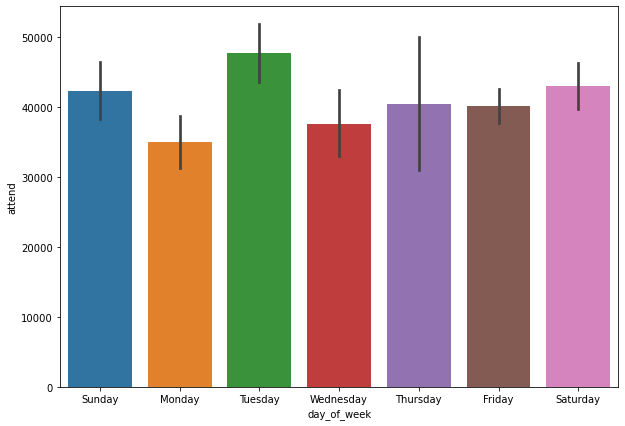

In [105]:
# Create a bar plot of the attendance by day of the week
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(df['day_of_week'], df['attend'], 
            order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

<AxesSubplot:xlabel='opponent', ylabel='attend'>

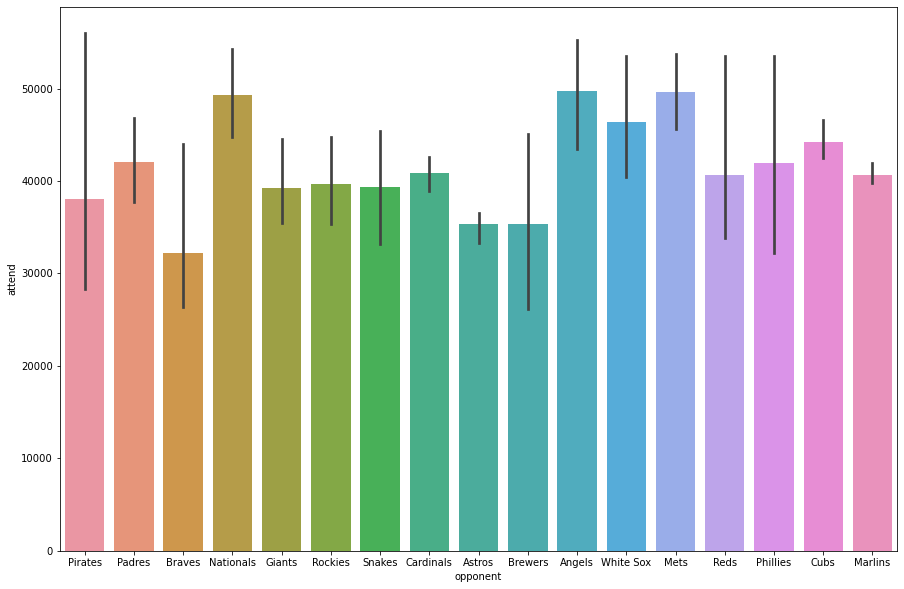

In [83]:
# Create a bar plot of the attendance by team
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(df['opponent'], df['attend'])

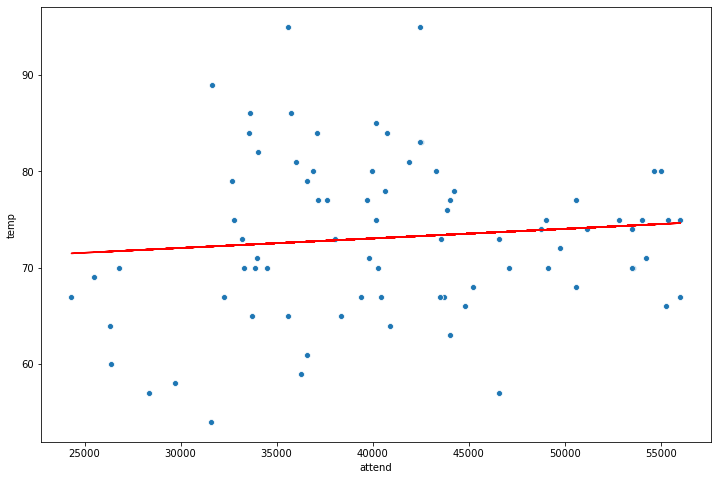

In [91]:
# Scatter plot of attendance by temperature

m, b = np.polyfit(df['attend'], df['temp'], 1)
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(df['attend'], df['temp'])
plt.plot(df['attend'], m*df['attend']+b, color = 'r')

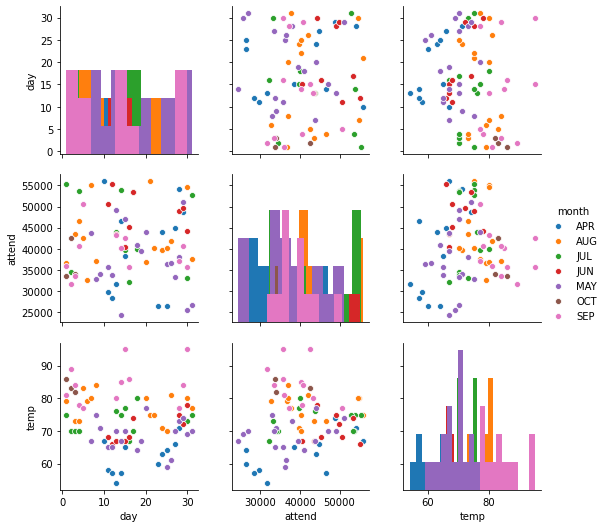

In [104]:
# Visualize data using sns.pairplot (provides a number of scatterplots against all the numeric values)
sns.pairplot(df, hue = "month", diag_kind = 'hist')

<AxesSubplot:xlabel='month', ylabel='attend'>

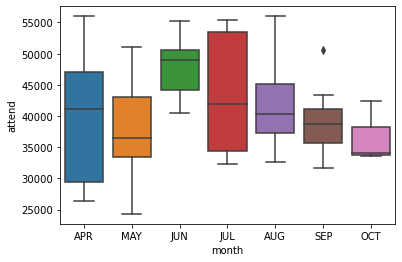

In [108]:
# create boxplots by month

sns.boxplot(df['month'], df['attend'], order = ['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'])

<AxesSubplot:xlabel='skies', ylabel='attend'>

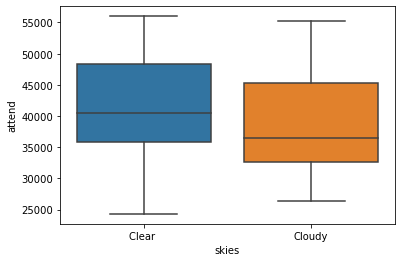

In [114]:
# create boxplots by skies

sns.boxplot(df['skies'], df['attend'])

<AxesSubplot:xlabel='day_night', ylabel='attend'>

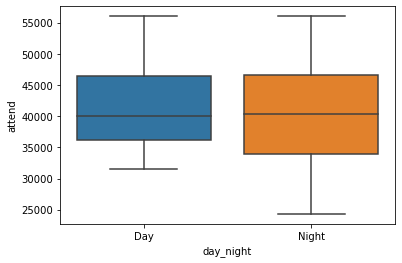

In [115]:
# create boxplot by day or night game

sns.boxplot(df['day_night'], df['attend'])

<AxesSubplot:xlabel='cap', ylabel='attend'>

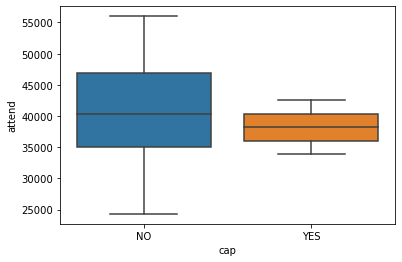

In [178]:
# create boxplot by cap offered

sns.boxplot(df['cap'], df['attend'])

<AxesSubplot:xlabel='shirt', ylabel='attend'>

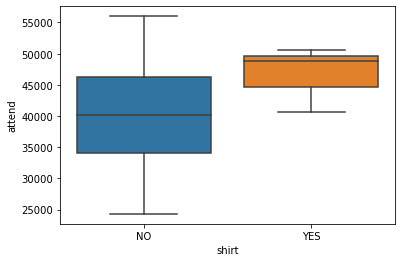

In [179]:
# create boxplot by shirt offered

sns.boxplot(df['shirt'], df['attend'])

<AxesSubplot:xlabel='fireworks', ylabel='attend'>

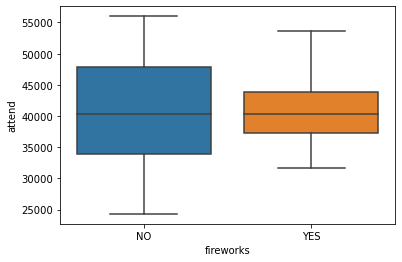

In [180]:
# create boxplot of attendance based on fireworks display

sns.boxplot(df['fireworks'], df['attend'])

<AxesSubplot:xlabel='bobblehead', ylabel='attend'>

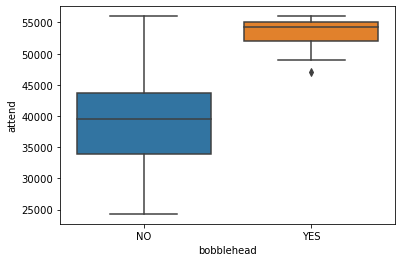

In [181]:
# create boxplot by bobblehead offered

sns.boxplot(df['bobblehead'], df['attend'])

<AxesSubplot:>

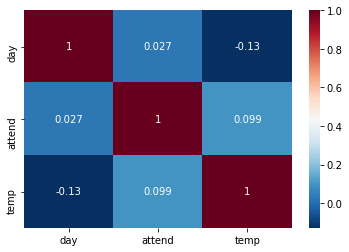

In [113]:
# create a correlation matrix

num_features = ['day', 'attend', 'temp']
pearsoncorr = df[num_features].corr(method = 'pearson')
sns.heatmap(pearsoncorr,
           xticklabels = pearsoncorr.columns,
           yticklabels = pearsoncorr.columns,
           cmap = 'RdBu_r', annot = True)

In [122]:
# Evaluate the difference with the categorical promotions
print(df.groupby('cap').mean())
print(df.groupby('shirt').mean())
print(df.groupby('fireworks').mean())
print(df.groupby('bobblehead').mean())

           day        attend       temp
cap                                    
NO   16.443038  41112.240506  73.063291
YES   4.000000  38189.500000  76.500000
             day        attend       temp
shirt                                    
NO     16.192308  40824.551282  73.141026
YES    14.666667  46643.666667  73.333333
                 day        attend       temp
fireworks                                    
NO         15.701493  41032.179104  73.865672
YES        18.214286  41077.857143  69.714286
                  day        attend       temp
bobblehead                                    
NO          15.585714  39137.928571  72.985714
YES         19.636364  53144.636364  74.181818


#### Bobblehead appears to have the greatest difference with attendance promotion

<AxesSubplot:xlabel='bobblehead', ylabel='count'>

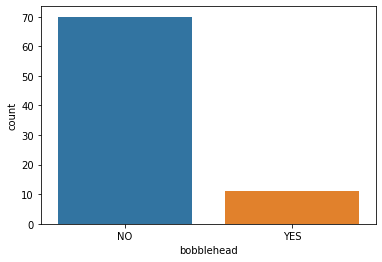

In [123]:
# create a countplot of number of bobblehead promotions

sns.countplot(df['bobblehead'])

### Create Logistic Regression Model Using Bobblehead

In [172]:
# create x and y variables for lR model

X = df[['attend', 'temp']]
y = df['bobblehead']

In [173]:
# perform train, test, split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [174]:
# Apply the logestic regression model

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

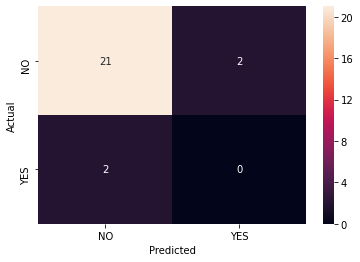

In [175]:
# Create confusion matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)

In [183]:
# Calculate model accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.84


### Assess correlation between attendance and bobblehead nights

In [219]:
# Assess correlation between bobblehead and attendance

df3 = df[['attend', 'bobblehead']]  # create a df3 with just attendance and bobblehead info

df3['bobblehead'] = df3['bobblehead'].replace(['YES'], 1)  # replace YES with 1
df3['bobblehead'] = df3['bobblehead'].replace(['NO'], 0)   # replace NO with 0


C:\Users\quefi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\quefi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [214]:
# Ensure all columns are numeric

df3['bobblehead'] = df3['bobblehead'].astype(int) # convert the bobblehead column to numeric values

C:\Users\quefi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
# check the data type

df3.dtypes

attend        int64
bobblehead    int64
dtype: object

In [217]:
# Perform correlation analysis

df3.corr()

,attend,bobblehead
attend,1.000000,0.581895
bobblehead,0.581895,1.000000
